<a href="https://colab.research.google.com/github/Reyna-Sun/Wine-Rating-and-Price-by-Vivino-using-Machine-Learning-Algorithms/blob/main/Final_Integrated_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                      Wine Rating and Price By Vivino

### By Reyna Vargas
### 2021083     
    

## Abstract

By Kaggle site, it had gotten the database 'Red', which is about Red wine rating in Vivino.com. Vivino is a online market and wine app with over 26 million users around the world, where the users can find millions of wines types and styles. The Vivino app helps to consumers take a picture of a bottle's label and the app finds information about the wine as rating score, price, reviews, and more features.

## Introduction

Nowadays people are involved more and more in digital world and social media, where is easy to find everything they need or they want with a single click in any online store, and where there are more possibilities to see different options according the budget, tastes or suggestions. People have been influenced by social influences in all kinds of stuff, one of them is 'drink', even sometimes is not possible to find the drink in a physical store, it more likely to do by an online store or app, where consumers find what they want and they see reviews of products.

Vivino is an app where consumers can search whatever kind of wine as red, rose, sparkling and white. The app collects data about prices, ranting, reviews, taste, regional style and the winery from the wine is originated. Using the data from this app, which will be analyzed to apply the knowledge from Statistical Techniques for Data, Data Preparation and Machine Learning

# Exploratory Data Analysis (EDA)

### Importing the libraries

In [ ]:
import pandas as pd #Data manipulation and analysis
import numpy as np  # For mathematical an logical operations on arrays can be performed
import seaborn as sns #It provides a high-level interface for drawing attractive and informative statistical graphics
import matplotlib as mpl #It is a cross-platform, data visualization and graphical plotting library
import matplotlib.pyplot as plt #pyplot is a plotting library used for 2D graphics
%matplotlib inline
sns.set(color_codes=True)

###  Loading the data into the data frame

In [ ]:
wine=pd.read_csv('Red.csv')

### Description of data

In [ ]:
wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [ ]:
wine.shape

(8666, 8)

Dataset was gotten by Kaggle, where can see four file for each winestyle, one of them is about red wine, which was selected to work in this Integrated Assessment. The dataset contains 8,666 rows and 8 columns, the data has the next attributes:
      
      1. Name: Name of the wine
      2. Country: Country come from
      3. Region: Region of the country come from
      4. Winery: Name of the winery
      5. Rating: overall consumer rating (measured on a scale from 0 to 5)
                  3.0 - 3.4 : Average
                  3.5 - 3.9 : Good stuff
                  4.0 - 4.4 : Very good stuff
                  4.5 - 5.0 : Rare & extraordinay
      6. NumberOfRatings: Number of reviews given to a specific bottle by consumers
      7. Price: Average price per bottle
      8. Year: Year of production

### Checking the types of data

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


Checking the information about the data and datatypes of each respective attribute, it has gotten:

          1. Five variables type 'object' and qualitative (Name, Country, Region, Winery and Year).
          2. Two variables type 'float' and quantitative (Rating and Price)
          3. One variable type 'Integer' and quantitative (NumberOfRatings)

Each variable has 8,666 values, hence, no missing values.

## Handling Duplicate rows

In [ ]:
duplicate= wine.duplicated()
print(duplicate.sum())

0


Before checking the variables, it has been seen that the dataset does not contain any duplicated rows.

In other hand, the variable 'Year' even it would be type 'Integer', it is type 'Object’, thus, the variable will be analyzed for changing it if that is possible.

In [ ]:
Year_list= pd.value_counts(wine['Year'])
Year_list

2016    1776
2017    1558
2015    1396
2018    1099
2014     798
2013     564
2012     371
2011     278
2010     174
2005     154
2019     116
2009      84
2008      80
2006      44
2007      43
2004      27
2000      19
1999      15
2001      12
2003      11
N.V.       8
2002       7
1997       7
1998       6
1996       5
1995       4
1992       3
1990       2
1989       2
1993       1
1991       1
1988       1
Name: Year, dtype: int64

The variable 'Year' has eight values which are type object and they could not change and these values do not represent any year in specific, that means, it will be not affected the data, so, the values are eliminated for converting to Integer data.

In [ ]:
wine = wine.drop(wine[wine['Year']=='N.V.'].index)

Also the variable 'NumberOfRatings' will be renamed as 'Reviews', this for a better understanding of the variable.

In [ ]:
wine.columns=['Name','Country','Region','Winery','Rating','Reviews','Price','Year']
wine.columns

Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'Reviews', 'Price',
       'Year'],
      dtype='object')

In [ ]:
wine=wine[['Name','Country','Region','Winery','Year','Rating','Reviews','Price']]

### Data type 'object'

In [ ]:
wine.describe(include=[object])

,Name,Country,Region,Winery,Year
count,8658,8658,8658,8658,8658
unique,6713,30,623,2713,31
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,2016
freq,43,2646,325,40,1776


Now, the database has four variables type object, which after to eliminate rows, the total of values in each variable is 8,658. The table above describes how many categories are divided each variable and their mode respectively. Then, each variable is explained:

      1. Name: The variable is divided into 6,713 categories where the most popular wine is 'Cabernet Sauvignon 2017' with
               43 mentions in the dataset.
      2. Country: The variable is divided into 30 categories where the mode is 'Italy', which means, the best selling
               wines, by Vivino, come from 'Italy' and it does not matter the name of the wine or Winery.
      3. Region: The variable is divided into 623 categories, which means, there are 325 types of wines come from 'Rioja'.
      4. Winery: The variable has 2,713 categories, where the winery 'Errazuriz'manages, in this app, 40 kinds of wine.
      5. Year: The variable refers to production of wines by 31 years from 1988 to 2019, the best selling was by year 2016.

The next bar graph shows the counting of the first 30 rows and the Country 'France' has more values than Italy, even the pie graph show the percentage of participation of each country and Italy gets 30.56%, and France, which, seemed has more participation, gets 26.05%.

<AxesSubplot:xlabel='count', ylabel='Country'>

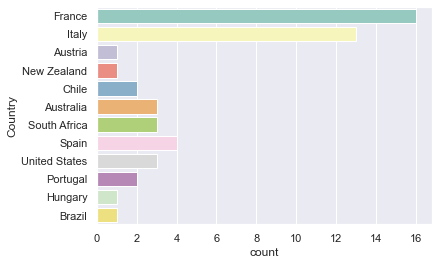

In [ ]:
sns.countplot(y='Country', data=wine.iloc[0:50], palette='Set3')

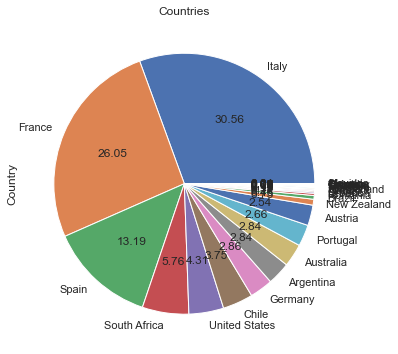

In [ ]:
plot = wine['Country'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='Countries')

As the variables 'Name', 'Region' and 'Winery' have many categories, it is a bit difficult to plot them. For example if the variable 'Region' is plotting, it gets the next graph and it is not clear to get a good outcome.

<AxesSubplot:xlabel='count', ylabel='Region'>

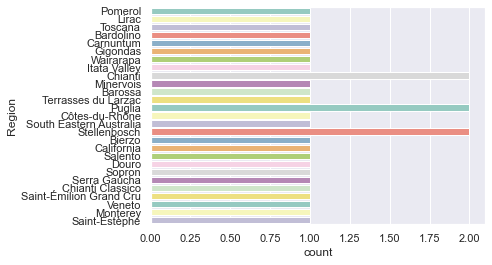

In [ ]:
sns.countplot(y='Region', data=wine.iloc[0:30], palette='Set3')

<AxesSubplot:xlabel='count', ylabel='Year'>

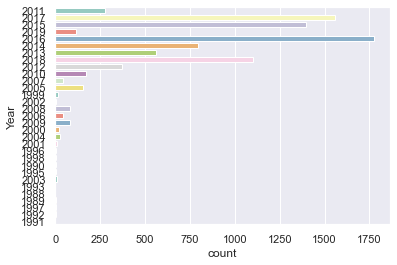

In [ ]:
sns.countplot(y='Year', data=wine, palette='Set3')

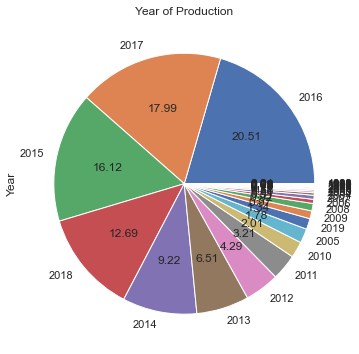

In [ ]:
plot = wine['Year'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='Year of Production')

Both graphs show that wines by a production the first years do not have too much participation, it means, consumers have bought production of wines the last years, the pie chart shows from production of 2010 has been a partipation higher than 2%.

### Data type 'Numeric'

In [ ]:
wine.describe()

,Rating,Reviews,Price
count,8658.000000,8658.000000,8658.000000
mean,3.890148,409.761839,39.149789
std,0.308429,857.614243,84.963503
min,2.500000,25.000000,3.550000
25%,3.700000,66.000000,10.682500
50%,3.900000,157.000000,18.200000
75%,4.100000,400.750000,38.227500
max,4.800000,20293.000000,3410.790000


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

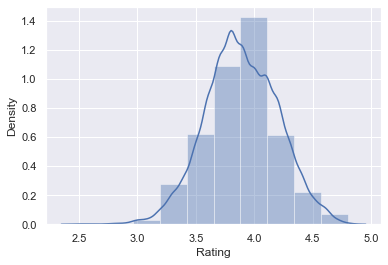

In [ ]:
sns.distplot(wine['Rating'], bins=10)

In [ ]:
Mode_Rating = wine['Rating'].mode()
print(Mode_Rating)

0    3.8
dtype: float64


From the Outcome 'wine.describe()', it can be viewed the central tendency measures of the numeric variables or quantitative variables, where has gotten:
         
1. Rating: The average of Rating is 3.89, median is 3.9 and mode of 3.8, which could seem to have a normal distribution,              although that does not happen because they are not exactly same, which can look in the 'Rating' graph. The range            of this variable manages a scale between 0 to 5, even the consumers has ranked the wines in a range between 2.5            to 4.8.

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

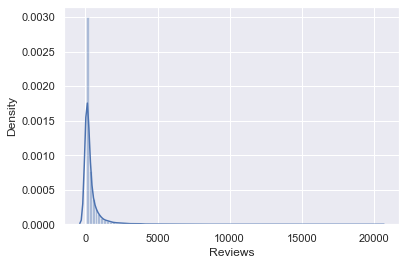

In [ ]:
sns.distplot(wine['Reviews'], bins=100)

In [ ]:
Mode_Reviews = wine['Reviews'].mode()
print(Mode_Reviews)

0    30
dtype: int64


2. Reviews: Its mean is 409.76, the median is 157 and mode of 30, really the data in this variable is so dispersed, as the central tendency measures shows and also the 'Reviews' graph, which has a positive skewness of distribution, this indicates that there are more observations with less reviews than observations with many reviews.

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

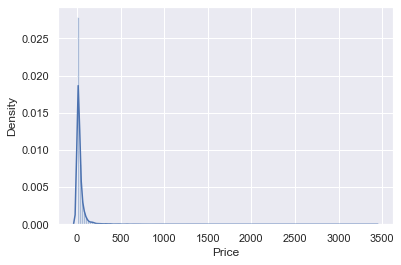

In [ ]:
sns.distplot(wine['Price'], bins=150)

In [ ]:
Mode_Price = wine['Price'].mode()
print(Mode_Price)

0    9.9
dtype: float64


3. Price: The average price per wine bottle is 39.15, the median is 18.2 and the mode 9.9, which means, it is most popular the bottles has a price of 9.9 and mean is so big because there is a variety of prices. In addition, the graph of Price shows positive skewness of distribucion.

## Handling Outliers

Outlier is a data point that differs significantly from the observations, they can be a mistake during the data collection or an atypical observation, that can be affect the analysis of data. Therefore, it is important to find these values, an easy way for doing it, it is plotting with the help of boxplot.

In [ ]:
Year_frecuency=100 *wine['Year'].value_counts() / len(wine['Year'])
Year_frecuency

2016    20.512821
2017    17.994918
2015    16.123816
2018    12.693463
2014     9.216909
2013     6.514207
2012     4.285054
2011     3.210903
2010     2.009702
2005     1.778702
2019     1.339801
2009     0.970201
2008     0.924001
2006     0.508201
2007     0.496650
2004     0.311850
2000     0.219450
1999     0.173250
2001     0.138600
2003     0.127050
1997     0.080850
2002     0.080850
1998     0.069300
1996     0.057750
1995     0.046200
1992     0.034650
1990     0.023100
1989     0.023100
1991     0.011550
1988     0.011550
1993     0.011550
Name: Year, dtype: float64

Even if 'Year' is a qualitative variable, calculating the frequency of bottles selling per year of production, it can see the sales have been more outstanding with the production from year '2010'. That means the years from 1988 to 2009 will be eliminated.

In [ ]:
wine = wine.drop(wine[wine['Year']<'2010'].index)

<AxesSubplot:xlabel='count', ylabel='Year'>

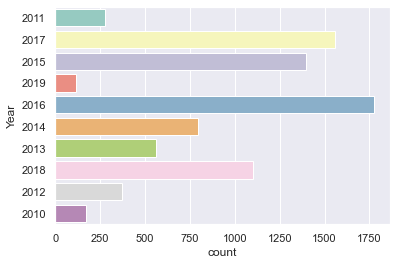

In [ ]:
sns.countplot(y='Year', data=wine, palette='Set3')

In [ ]:
wine.shape

(8130, 8)

In [ ]:
wine.describe()

,Rating,Reviews,Price
count,8130.000000,8130.000000,8130.000000
mean,3.873727,405.889176,33.654415
std,0.302556,867.057379,71.878670
min,2.500000,25.000000,3.550000
25%,3.700000,65.000000,10.355000
50%,3.900000,154.000000,17.060000
75%,4.100000,389.000000,34.897500
max,4.800000,20293.000000,3410.790000


As before, it was mentioned, easy way to see the outliers is plotting by boxplot, so, applying this method, below it can see the boxplot to each quantitative variable. Additionally, getting the information from 'wine.describe', this table shows numeric information, which are used to build the boxplot and to know which values are into the boxplot, in the whiskers and outside of graph, it means, the outliers.

       1. Rating: The outliers of this variable are those values that they are lower than 3.2 and upper than 4.6. Even cocentration of points are in the box, which are in a range between 3.7 and 4.0 for 'Rating', the range is very closed. So, plenty of the wines in this app are considering in a good rating between 3.7 to 4.
       
       2. Reviews: by the boxplot (under), it can be appreciated, there are many outliers, one assumption could be that the consumers do not like to write a review or they do not mind to do it. Most of the points are inside a range of 60 to 285 reviews, even there are few wines have until to 874 reviews.
       
       3. Price: There are a variety of price, which can be analyzed by the table above, where the values of the box are between 9.90 to 28.27, that means, the consumers can find a good wine whitout to be expensive.

<AxesSubplot:xlabel='Price'>

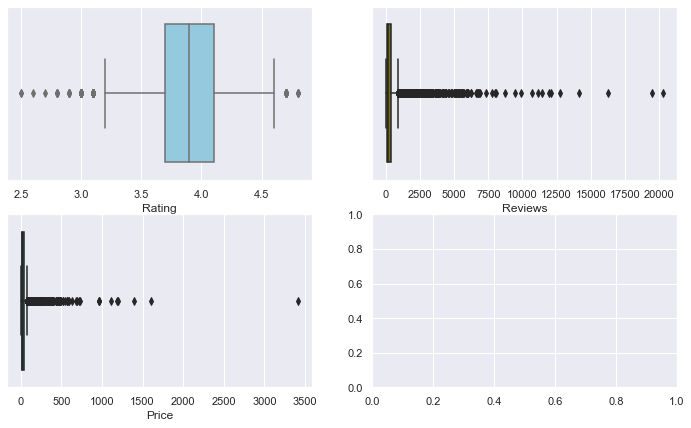

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
sns.boxplot(data=wine, x="Rating", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=wine, x="Reviews", color="olive", ax=axs[0, 1])
sns.boxplot(data=wine, x="Price",  color="teal", ax=axs[1, 0])

Applying Interquartile Range (IQR), which a measure of statiscal dispersion, it helps to calculate the lower and upper whiskers for finding the outliers and to remove them.

In [ ]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Rating       0.4000
Reviews    324.0000
Price       24.5425
dtype: float64


In [ ]:
wine= wine[~((wine < (Q1-1.5 * IQR)) |(wine > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
wine.shape

(6542, 8)

As it can see in the graphs below, the variables have been cleaned of the most of outliers as the boxplots shows and also the histagram shows better plotting of the data after applying IQR technique.

<AxesSubplot:xlabel='Price'>

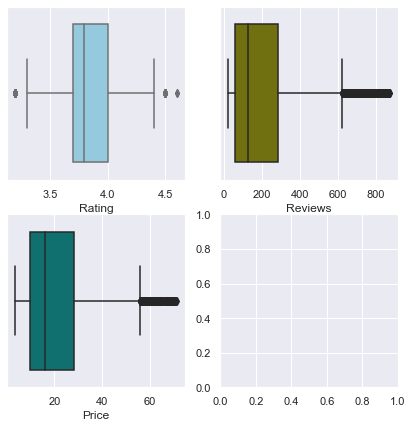

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.boxplot(data=wine, x="Rating", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=wine, x="Reviews", color="olive", ax=axs[0, 1])
sns.boxplot(data=wine, x="Price",  color="teal", ax=axs[1, 0])

<AxesSubplot:xlabel='Price', ylabel='Count'>

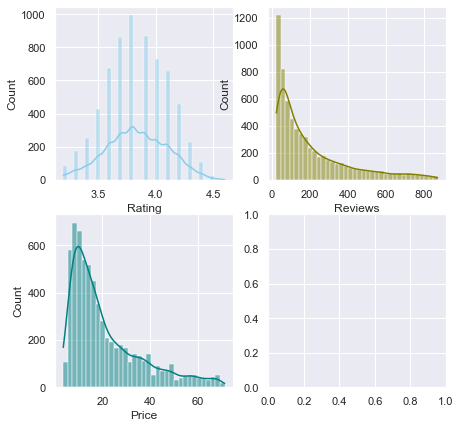

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=wine, x="Rating", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=wine, x="Reviews", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=wine, x="Price", kde=True, color="teal", ax=axs[1, 0])

## Bi- Variate Analysis

Correlation measures how the values of two variables change with respect to each other and it analyzes the relationship between two variables. Heat maps can be use to do it.

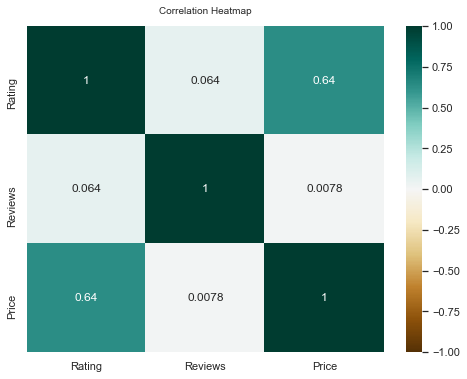

In [ ]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

The heat maps allows to see there is Moderate Positive Correlation between the variables 'Rating' and 'Price', that means, one of these variable is moderately associated with the other and both variables change in the same direction for being a positive correlation as the graphs show below. However the variable 'Reviews' has a value of correlation coefficient close to zero, it means, it does not have correlation with the variables 'Rating' and 'Price'.

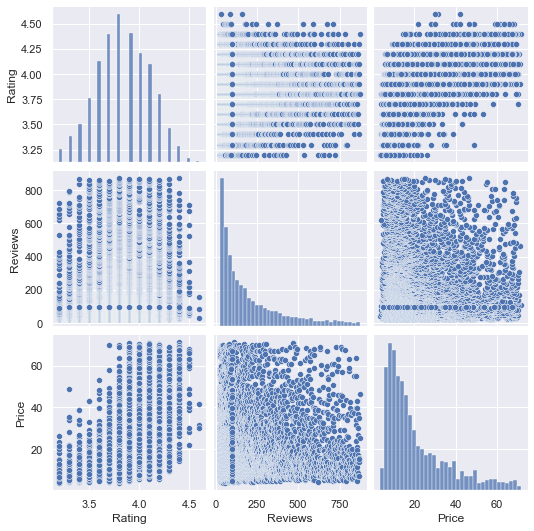

In [ ]:
sns.pairplot(wine)

## Encoding

The dataset has four variables type object, where each of them has many categories, in the case of 'Year', which has 10 categories, it is encoding using 'Ordinal Encoder' because it helps to have a natural rank ordering and machine learning algorithms may able to understand the relationship. Besides that the variable can be considered as a factor for choosing to get a good rating, as well as place the wine come from.

In [ ]:
wine.describe(include=[object])

,Name,Country,Region,Winery,Year
count,6542,6542,6542,6542,6542
unique,5245,28,573,2456,10
top,Cabernet Sauvignon 2017,Italy,Rioja,Delas,2016
freq,30,2109,220,23,1439


In [ ]:
wine.head()

,Name,Country,Region,Winery,Year,Rating,Reviews,Price
1,Lirac 2017,France,Lirac,Château Mont-Redon,2017,4.3,100,15.50
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,2015,3.9,100,7.45
3,Bardolino 2019,Italy,Bardolino,Cavalchina,2019,3.5,100,8.72
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,2016,3.9,100,29.15
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,2017,3.7,100,19.90


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(wine[['Year']])
wine['Year_Encoding'] = encoder.transform(wine[['Year']])

In [ ]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Country'], return_df=True)


wine['Country_Encoding'] = encoder.fit_transform(wine[['Country']])


D:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
wine.head()

,Name,Country,Region,Winery,Year,Rating,Reviews,Price,Year_Encoding,Country_Encoding
1,Lirac 2017,France,Lirac,Château Mont-Redon,2017,4.3,100,15.50,7.0,1
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,2015,3.9,100,7.45,5.0,2
3,Bardolino 2019,Italy,Bardolino,Cavalchina,2019,3.5,100,8.72,9.0,2
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,2016,3.9,100,29.15,6.0,3
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,2017,3.7,100,19.90,7.0,1


# Principal Components Analysis (PCA)

Principal Components Analysis basically search a linear combination the variables in order to extract the maximum variance from the variables, it tries to preserve the most essential parts that have more variation of the data and remove that non-essential. In addition it is an unsupervised dimensionality reduction technique.

To wine's dataset is not really necessary because it has only 3 variables type 'quantitative' and 2 variables type 'categorical' that had been encoding. Considering only these variables, it will apply the PCA method.

            1. The first step is to allocate the dataset into two components X and y.
            2. Splitting X and y into the training and testing set.
            3. Doing the pre-processing part on training and testing by Standarnd Scaler
            4. Applying PCA into training and testing set.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = wine.iloc[:, 5:8].values
y = wine.iloc[:, 8].values

X

array([[  4.3 , 100.  ,  15.5 ],
       [  3.9 , 100.  ,   7.45],
       [  3.5 , 100.  ,   8.72],
       ...,
       [  3.7 ,  99.  ,  10.5 ],
       [  3.8 ,  99.  ,  11.6 ],
       [  4.3 ,  99.  ,  53.61]])

In [ ]:
y

array([7., 5., 9., ..., 7., 7., 5.])

In [ ]:
# Splitting between the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.54690922, 0.33235739])

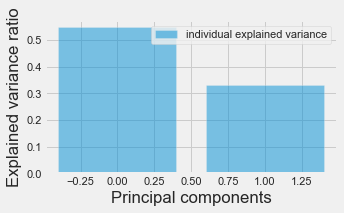

In [ ]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(5, 3))

    plt.bar(range(2), explained_variance, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))

X_train: (5233, 2)
X_test: (1309, 2)


In [ ]:
Components = pd.DataFrame(data = X_test,
              columns = ['principal component 1', 'principal component 2'])
Components.tail()

,principal component 1,principal component 2
1304,0.851726,1.747731
1305,-1.832518,-0.346070
1306,3.590425,-0.204784
1307,-0.801610,2.251369
1308,-1.092987,-0.726249


Due to the number of variables, PCA had worked just using two components, the first component holds 54.69% of the information while the second component holds 33.24% of de variance, that means 12.07% information was lost.

To verify that the two resulting variables represent the original variables, we are going to make the prediction of the dependent variable with logistic regression, checking the prediction results with the confusion matrix.


## Logistic Regression

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

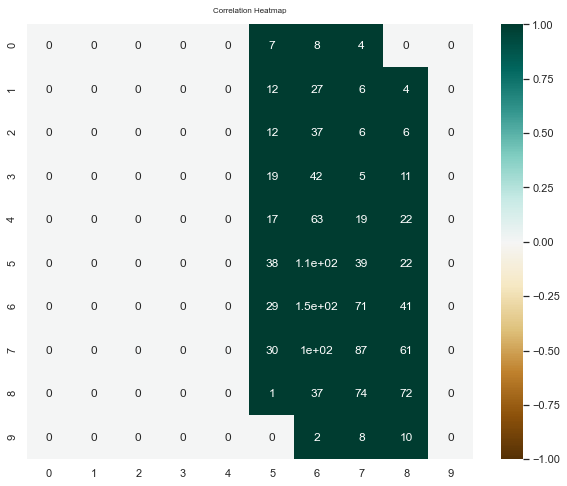

In [ ]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cm, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12);

The confusion matrix shows that applying Logistic Regression it has gotten many predictions false positive, that means, year of production is an important factor for choosing a wine in the app but it is not.

Getting the accuracy by R-squared below, it can see, the model have just 26.2% of accuracy to Testing set and 26.2% to training set.

In [ ]:
# Display the score values by calling lr

print("Training set score: {:.3f}".format(classifier.score(X_train, y_train)))
print("Test set score (R^2): {:.3f}".format(classifier.score(X_test, y_test)))

Training set score: 0.262
Test set score (R^2): 0.262


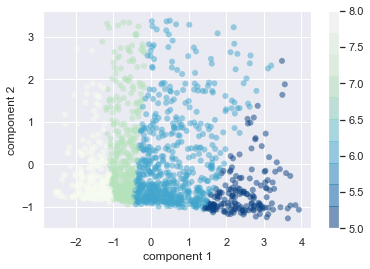

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_pred, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('GnBu_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Linear Regression

Linear Regression is a statistical model to predict the relationship between two variables, the variable that is being predicted is called the dependent variable (y) and the variable that is used to predict the value of the dependent variable is called independent variable.

As before was analyzed the correlation of the variables, it could have seen that the variables 'Price' and 'Rating' have a moderated correlation, hence, these variables are selected for building a model to predict by Linear Regression.

The objective to use linear regression, for this dataset, is to know if "The rating has been affected by the Price".

The variable dependent is 'Rating' and the variable independent is 'Price' to this analysis.

The graph below shows the dispersion of the dataset between the variable previously mentioned and it is classified by year.

<AxesSubplot:xlabel='Price', ylabel='Rating'>

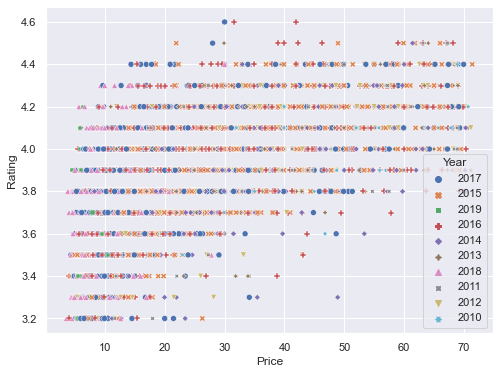

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wine, x='Price', y='Rating', hue='Year', style='Year')

In [ ]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# split out of dataset between train (80%) and test

X = wine['Price']      # INDEPENDENT VARIABLE: The variable used to predict the dependent variable
y = wine['Rating']     # DEPENDENT VARIABLE: Variable we wish to predict

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
# Display the coefficient and intercept values
print("lr.coef_:{} ".format(lr.coef_))
print("lr.intercept_:{} ".format(lr.intercept_))

lr.coef_:[[0.01117515]] 
lr.intercept_:[3.59587844] 


In [ ]:
# Display the score values by calling lr
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.3f}".format(lr.score(X_test, y_test)))

Training set score: 0.406
Test set score (R^2): 0.412


Applying Linear Regression by SciKit Learn and splitting the dataset between train and test, it had gotten the model:
                               
                                   y= 0.011175x + 3.5959
                                   
That means, the rating increases by 0.011175 euros, for every 100 euros the rating will increase one point. Thus the price is not affecting the rating, which is supporting by coefficient of determination (R^2), that say, the model is not a good fit for the data because it is just explaining 40% of the variation in the outcome.  

Below, it shows the prediction of the variable, as it can see the predictions between one and other are small.

In [ ]:
# Prediction Values
prediction=lr.predict(X_test)
prediction

array([[4.03103883],
       [4.09283742],
       [4.09820149],
       ...,
       [4.09876025],
       [3.83558544],
       [3.99706637]])

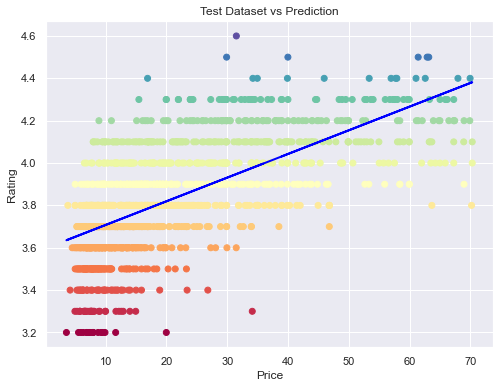

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, c=y_test, cmap='Spectral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Test Dataset vs Prediction')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.plot(X_test, prediction, color='blue', linewidth=2)
plt.show()

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

Applying K-means, the variable 'X' is defined by 'Rating', 'Reviews' and 'Price' to use K-means and to cluster them if that is possible.

In [ ]:
X = wine[['Rating','Price']]

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Fitting the dataset
min_max_scaler = preprocessing.MinMaxScaler()
df_wine = min_max_scaler.fit_transform(X)
df_wine = pd.DataFrame(df_wine)
df_wine = df_wine.rename(columns = {0: 'Rating', 1: 'Price'})
df_wine.head()

,Rating,Price
0,0.785714,0.176150
1,0.500000,0.057488
2,0.214286,0.076209
3,0.500000,0.377358
4,0.357143,0.241008


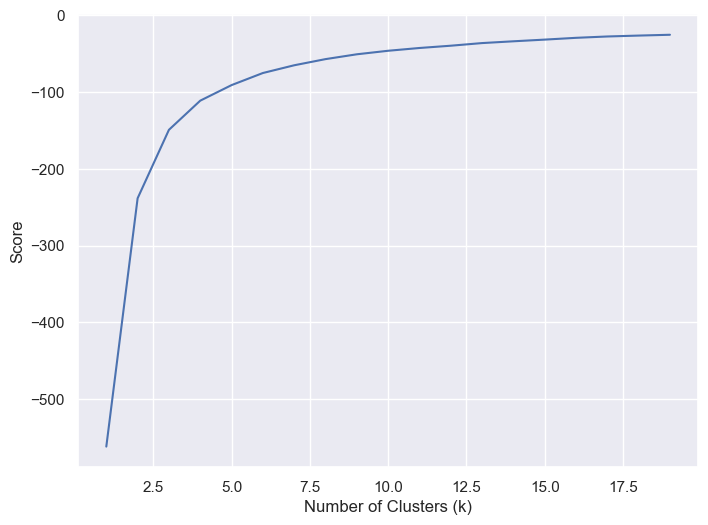

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_wine).score(df_wine) for i in range(len(kmeans))]
score
plt.figure(figsize=(8, 6))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.plot(nc,score)

The output graph of the Elbow method is shown above that its shape is approximately formed at k=4. The optimal value of k is between 3 anf 5, even it will use k=4 for applying K-means.

In [ ]:
kmeans = KMeans(n_clusters=4).fit(df_wine)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.44586523 0.14883484]
 [0.68147208 0.74171722]
 [0.2055421  0.10054898]
 [0.60462185 0.37645758]]


In [ ]:
labels = kmeans.predict(df_wine)
df_wine['label'] = labels

In [ ]:
df_wine.head()

,Rating,Price,label
0,0.785714,0.176150,3
1,0.500000,0.057488,0
2,0.214286,0.076209,2
3,0.500000,0.377358,3
4,0.357143,0.241008,0


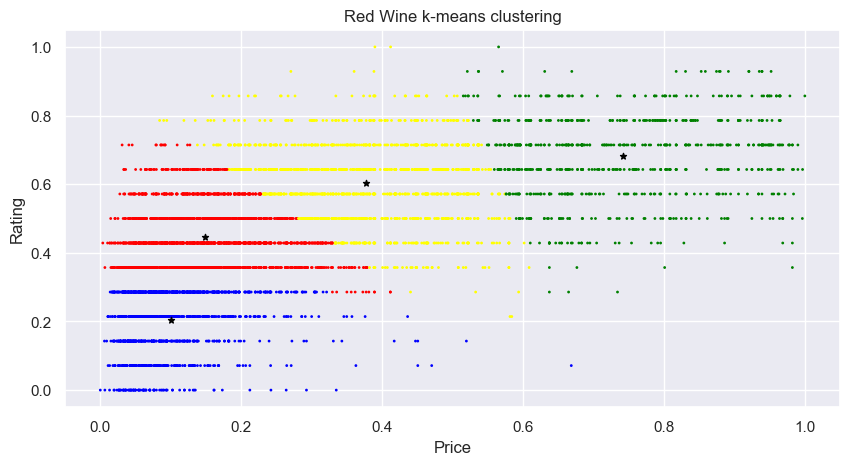

In [ ]:
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(df_wine.Price, df_wine.Rating, c=asignar, s=1)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=20)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Red Wine k-means clustering')
plt.show()

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.17929636806870775


The accuracy of the model is 17.92% that means in first instance the model does not working well by K-means, even it showing that it can work the datasets by samples and to find a single model to each sample..

# Decision Tree

A decision tree is one of most frequently and widely used supervised machine learning algorithms that can perform both regression and classification tasks. The intuition behind the decision tree algorithm is simple, yet also very powerful.

For each attribute in the dataset, the decision tree algorithm forms a node, where the most important attribute is placed at the root node. For evaluation we start at the root node and work our way down the tree by following the corresponding node that meets our condition or "decision". This process continues until a leaf node is reached, which contains the prediction or the outcome of the decision tree.

The root node, to model the Red wine dataset, is the label 'Year_Encoding' and the rest of the variables will be take to evaluation and analysis. The X variable is our attribute set and y variable contains corresponding labels.

In [ ]:
wine.head()

,Name,Country,Region,Winery,Year,Rating,Reviews,Price,Year_Encoding,Country_Encoding
1,Lirac 2017,France,Lirac,Château Mont-Redon,2017,4.3,100,15.50,7.0,1
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,2015,3.9,100,7.45,5.0,2
3,Bardolino 2019,Italy,Bardolino,Cavalchina,2019,3.5,100,8.72,9.0,2
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,2016,3.9,100,29.15,6.0,3
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,2017,3.7,100,19.90,7.0,1


In [ ]:
features=wine.drop(['Name','Country','Region','Winery','Year','Rating'], axis=1)
X = np.array(features)
y = np.array(wine['Year_Encoding'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.20)

tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=5, min_samples_split=50)
tree = tree.fit(X_train, y_train)

tree.tree_.max_depth

5

Once the data has been divided into the training and testing sets, the final step is to train the decision tree algorithm on this data and make predictions.

In [ ]:
validation_prediction = tree.predict(X_val)
training_prediction = tree.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('Exactitud training data: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Exactitud validation data: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Exactitud training data:  0.9600611503917447
Exactitud validation data:  0.948051948051948


Using Decision tree, it has gotten an accuracy of 96% in Training set, the advantages of this method for predictive analysis is because it can be use to predict continuos and discrete values.

In [ ]:
!pip install graphviz

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

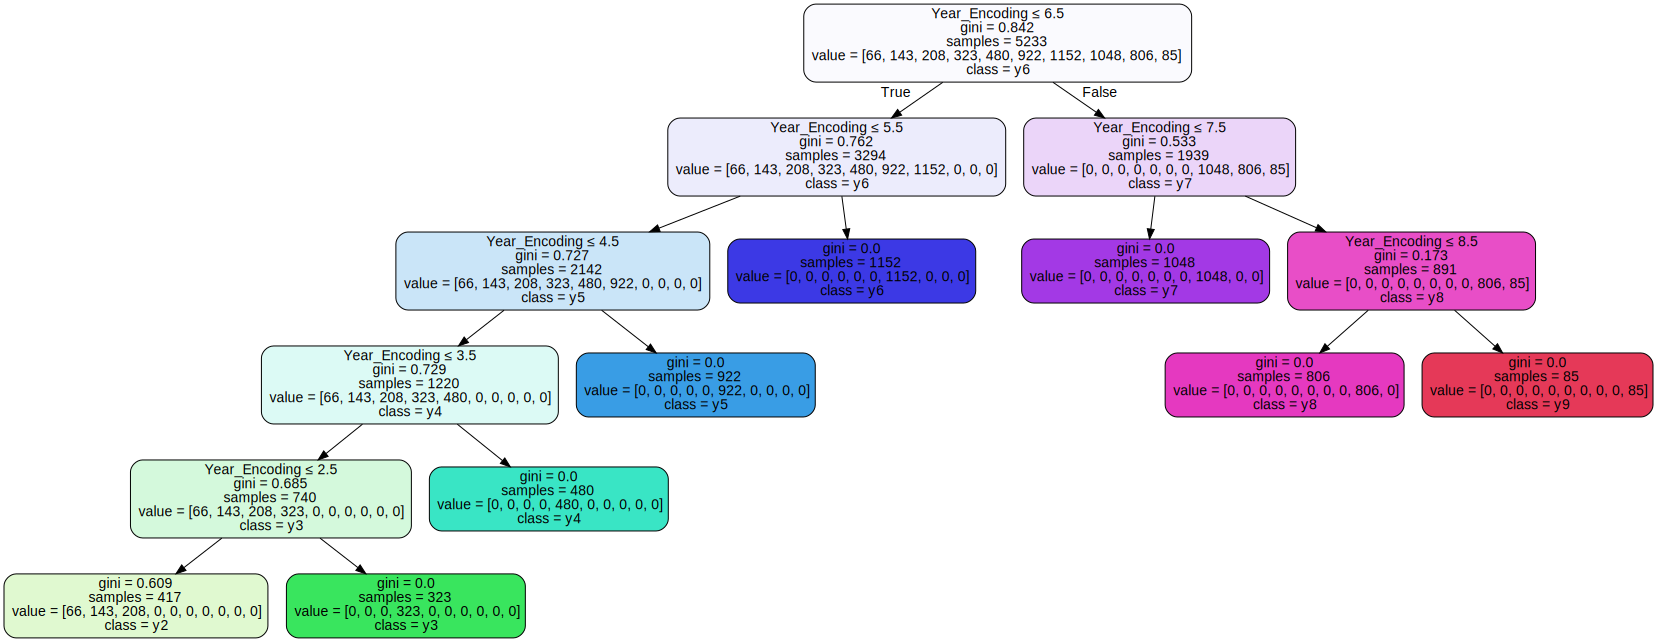

In [ ]:
feature_names = features.columns

dot_data = export_graphviz(tree, out_file=None,
                         feature_names=feature_names,
                         class_names=True,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)

graph

## Results of algorithms

The final result in accuracy, of the models applied shows a difference among the models chosen, it is the next:

In [ ]:
df = pd.DataFrame()

# creamos las columnas
df['Logistic Regression'] = None
df['Linear Regression'] = None
df['K-means'] = None
df['Decision Tree'] = None

# añadimos filas por su nombre de fila
df.loc['Accuracy at 80% Train'] = ['26.2%', '40.6%', '17.93%','96%']

df

,Logistic Regression,Linear Regression,K-means,Decision Tree
Accuracy at 80% Train,26.2%,40.6%,17.93%,96%


The last model applied, Decision Tree got the highest accuracy among of the rest of the models. To this dataset 'Red wine' have applied 5 models (including PCA), two of them unsupervised model and 3 supervised models, it had decided to use these models because the data has variables qualitives and quantitatives, where there were assumptions that these variables could be affected the rating of the wines, which was analyzed with the quantitatives variables by Decision tree and it showed that can happen that the consumers are looking into the app a good red wine based on the assumption of origin and year of producction.  

The models were training with an accuracy of 80%, that means only the model Decision tree does not have underfiting, that occurs because the model could not accurately capture the dependencies among data for its own simplicity.

# Reinforcement Learning (RL)

Reinforcement Learning is an area of Machine Learning, it is about learning the optimal behavior in an environment to obtain maximum gratification, throughout interactions with the environment and observations of how it responds as a kid, who learns exploring the world around and actions for getting a goal. Plenty of softwares and machines are using RL for finding the best possible path or behavior for taking in a specific situation.

The difference between supervised learning and Reinforcement Learning is that the second does not have answers for training the model with the correct answer, it has as own judgment, which learns from its experience for performing the given task. That means, it is making decisions sequentially and each output depends on the state of the current input and the next input depends on the output of the previous input.

However, RL involves an agent, who must learn to sense and pertub the state of the environment using its actions to derive maximal reward.

The Reinforcement Learnig is working if it has these elements:
                1. The agent or the learner
                2. The environment the agent interacts with
                3. The policy that the agent follows to take actions
                4. The reward signal that the agent observes upon taking actions

The algorithm (agent) evaluates a current situation (state), takes an action, and receives feedback (reward) from the environment after each act. Positive feedback is a reward and negative feedback is punishment for making a mistake.                

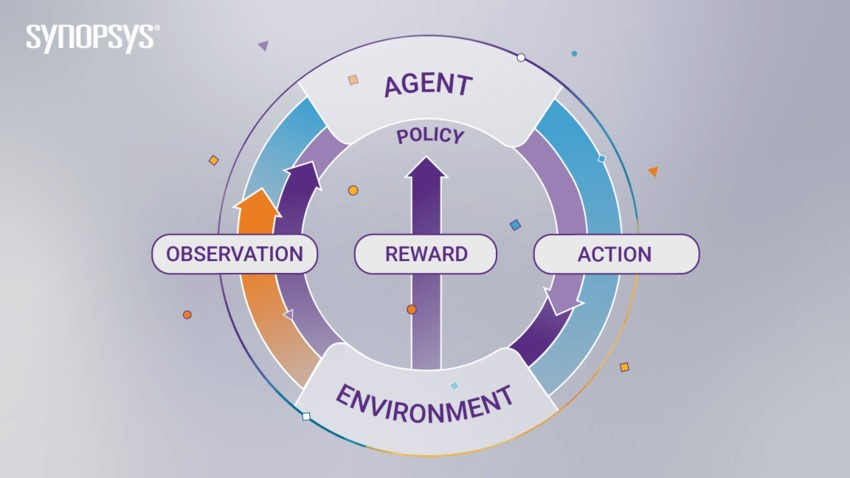

In [ ]:
from IPython import display
display.Image("rl.jpg")

## Reinforcement Learning in the real World

#### -Trading in financial industry

Financial institutions use AI-driven systems to automate trading tasks even these systems use supervised learning to making forecast stock price. they can not make decision in ta specific situation to buy, sell or hold.On the other hand RL models allow for making predictions that take into account outcomes of one’s actions on the market, this was noted by Michael Kearns in 2018 and also they may learn when is an appropiate time for action and/or the optimum size of trade.

IBM built a financial trading system on its Data Science Experience platform that utilizes reinforcement learning. “The model winds around training on the historical stock price data using stochastic actions at each time step, and we calculate the reward function based on the profit or loss for each trade,” said Aishwarya Srinivasan from IBM.

#### -eCommerce and internet advertising

RL algorithms are using for resolving a problem of impressions allocation on eCommerce sites like eBay, Taobao, and Amazon. The impressions calculate how much and advertiser has to pay to show his message on a website, one impression is counted by each time a user loads a page and the ad pops up. These platforms aim to generate maximum total revenue from transactions.

Collaborative filtering or content-based filtering is used to get the higher ranking positions that the sellers experiment with the prices, researching applied a general framework of reinforcement mechanis design to develop efficient algorithms that makes a better evaluation seller's behavior.

#### Games personalization

 Personalization of game experience is done through player modeling with the goal of increasing their enjoyment.Game components that can be adapted include space, mission, character, narrative, music and sound, game mechanics, difficulty scaling, and player matching (in multiplayer games).

#### Robotics

Specialists from the Google Brain Team and X company introduced a scalable reinforcement learning approach to solving a problem of training vision-based dynamic manipulation skills in robots. The goal was to train robots to grasp various objects, including objects unseen during training. Specialists designed a deep Q-learning algorithm (QT-Opt) that employs data collected during past training episodes (grasping attempts).

#### Autonomous vehicles training

UK company Wayve claims to be the first one to develop a driverless car that works with the help of RL. Wayve specialists spent only 15-20 minutes to teach a car from scratch to follow a lane through trial and error. A human driver that was in the vehicle during an experiment intervened when the algorithm made a mistake and the car was going off track. The algorithm was rewarded for a distance driven without intervention. That way a car has learned online getting better in driving safely with every exploration episode. Researchers explain the technical side of training in their blog post.

## Types of Reinforcement Learning methods

### Passive Learning:

The goal of a passive RL agent is to learn from it has observed but he doesn not have any decision about the policy, that means, the agent's policy has fixed previously and it does not change throughout training. The agent learns the expected utility for each state following the next methods:

       1.Direct Utility Estimation

The agent executes a sequence of trails or runs,each trial gives a sample value and the agent estimates the utility based on the samples values. Can be calculated as running averages of sample values. The main drawback is that this method makes a wrong assumption that state utilities are independent while in reality they are Markovian.
       

       2. Adaptive Dynamic Programming(ADP)
     
ADP is a smarter method than Direct Utility Estimation as it runs trials to learn the model of the environment by estimating the utility of a state as a sum of reward for being in that state and the expected discounted reward of being in the next state.

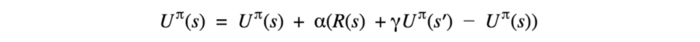

In [ ]:
from IPython import display
display.Image("ADP.png")

Where R(s) = reward for being in state s, P(s’|s, π(s)) = transition model, γ = discount factor and Uπ(s) = utility of being in state s’.

       3. Temporal Difference Learning (TD)
       
TD learning does not require the agent to learn the transition model. The update occurs between successive states and agent only updates states that are directly affected.

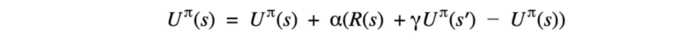

In [ ]:
display.Image("TD.png")

Where α = learning rate which determines the convergence to true utilities.

While ADP adjusts the utility of s with all its successor states, TD learning adjusts it with that of a single successor state s’. TD is slower in convergence but much simpler in terms of computation.

### Active Learning

During which the learning agent can use the feedback it receives to iteratively update its policy while learning until eventually determining the optimal policy after sufficient exploration.

       1. ADP with exploration function
       
Can be done using a passive ADP agent and then using value or policy iteration it can learn optimal actions. But this approach results into a greedy agent. Hence, we use an approach that gives higher weights to unexplored actions and lower weights to actions with lower utilities.

       2. Q-Learning
      
Q-learning is a TD learning method which does not require the agent to learn the transitional model, instead learns Q-value functions Q(s, a), which proposed learning the q-values of states directly, bypassing the need to ever know any values, transition functions, or reward functions.

As a result, Q-learning is entirely model-free. Q-learning uses the following update rule to perform what is known as q-value iteration:      

Below, if Pacman learned that Figure 1 is unfavorable after running vanilla Q-learning, it would still have no idea that Figure 2 or even Figure 3 are unfavorable as well. Approximate Q-learning tries to account for this by learning about a few general situations and extrapolating to many similar situations. The key to generalizing learning experiences is the feature-based representation of states, which represents each state as a vector known as a feature vector. For example, a feature vector for Pacman may encode

         • the distance to the closest ghost.
         • the distance to the closest food pellet.
         • the number of ghosts.
         • is Pacman trapped? 0 or 1


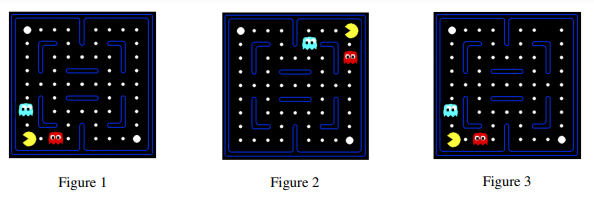

In [ ]:
display.Image("Pacman.PNG")

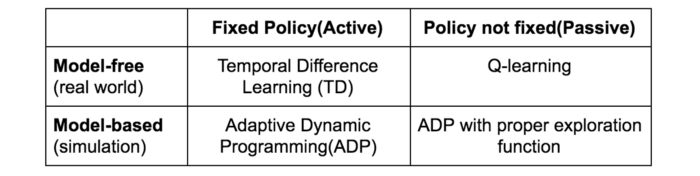

In [ ]:
display.Image("Comparison.png")

# Conclusion

In general it has been a complete assignment where I could have mixed all knowledge I have obtained in classes, it is really pleasing to know that each topic seen it has been applied in this job. To be honest I did not feel confident about my knowledge because I did not have experience in Python and good sources can offer, all the same, I feel excited for studying by myself, something I did not do when I was in the University. I have learnt that Python can help me to work the dataset a easy way, that is not necessary to work big information over different files and to identify how the data has to be managed properly. Other important learning is that we can methodize the models even we should not rely completely in a model, we have to support us with machines in order to get good results and efficient.

# References

1. Budnyak Anton (2020), 'Wine Rating & Price', available at https://www.kaggle.com/budnyak/wine-rating-and-price?select=Varieties.csv, accessed at 15 May 2021.

2. 'Vivino', available at https://www.vivino.com/IE/en/, accessed at 15 May 2021.

3. Singh Ritika (2020), 'Exploratory Data Analysis(EDA) in Python!', available at https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/, accessed 17 May 2021.

4. Edureka (2020), 'The Why And How Of Exploratory Data Analysis In Python', available at https://www.edureka.co/blog/exploratory-data-analysis-in-python/, accessed 17 May 2021.

5. Dan Atanu (2020), 'Exploratory Data Analysis (EDA) in Python', available at https://medium.com/@atanudan/exploratory-data-analysis-eda-in-python-893f963cc0c0, accessed 18 May 2020

6. Bownlee Jason (2020), 'Ordinal and One-Hot Encodings for Categorical Data', available at https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/, accessed 18 May 2021.

7. Stojiljković Mirko (2020), 'Linear Regression in Python', available at https://realpython.com/linear-regression-in-python/, accessed  20 May 2021.

8. Arvai Kevin (2020), 'K-Means Clustering in Python: A Practical Guide', available at https://realpython.com/k-means-clustering-python/, accessed at 20 May 2021.

9. Navlani Avinash (2018), 'Decision Tree Classification in Python', available at https://www.datacamp.com/community/tutorials/decision-tree-classification-python, accessed at 20 May 2021.

10. Bhatt Shwetta (2018), 'Explaining Reinforcement Learning: Active vs Passive', available at https://towardsdatascience.com/explaining-reinforcement-learning-active-vs-passive-a389f41e7195, accessed at 22 May 2021.

11. Bajaj Prateek (2020), 'Reinforcement learning', available at https://www.geeksforgeeks.org/what-is-reinforcement-learning/, accessed at 22 May 2021.

12. Ungaro Francesco (2019), 'Reinforcement Learning Explained: Overview, Comparisons and Applications in Business', available at https://www.altexsoft.com/blog/datascience/reinforcement-learning-explained-overview-comparisons-and-applications-in-business/, accessed 23 May 2021.

13. Synopsis (2021), 'What is Reinforcement Learning?', available at https://www.synopsys.com/ai/what-is-reinforcement-learning.html, accessed at 22 May 2021.
